**Read** Data. .Examine the shape and nature of the data. It is a good practice to look at the nature of the data , its shape before we start modelling it.Nature of the data is important when we do feature selection.

In [55]:
import numpy as np
import pandas as pd

df = pd.read_csv('./weatherAUS.csv')
print('Size of weather data frame is :',df.shape)
#Let us see how our data looks like!
df[0:5]

Size of weather data frame is : (145460, 24)


Date Location  MinTemp  ...  RainToday  RISK_MM  RainTomorrow
0  2008-12-01   Albury     13.4  ...         No      0.0            No
1  2008-12-02   Albury      7.4  ...         No      0.0            No
2  2008-12-03   Albury     12.9  ...         No      0.0            No
3  2008-12-04   Albury      9.2  ...         No      1.0            No
4  2008-12-05   Albury     17.5  ...         No      0.2            No

[5 rows x 24 columns]

In [56]:
df.shape

(145460, 24)

Drop RISK_MM column : We drop the column RISK_MM as asked for.

In [0]:
df.drop(columns=['RISK_MM'], axis = 1, inplace = True)

In [58]:
df.shape

(145460, 23)

# Data Pruning
### 1. Deal with Nan & null values
Count null values

In [59]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Few columns such as Sunshine, Evaporation, Cloud9am, Cloud3pm have greater than 50000 null values which is almost 33% or more. We can either **ignore** these columns or **fill** the NaN values with some dummy values. Here, we will these drop the features as it is almost one third of the data and we dont want to fill dummy values for quite a large data, as it might affect our model.


In [60]:
df.columns  # Currently available columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [63]:
## Drop Null valued columns
df.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am'], axis=1, inplace=True)
print("Existing columns")
print(df.columns.values)

Existing columns
['Date' 'Location' 'MinTemp' 'MaxTemp' 'Rainfall' 'WindGustDir'
 'WindGustSpeed' 'WindDir9am' 'WindDir3pm' 'WindSpeed9am' 'WindSpeed3pm'
 'Humidity9am' 'Humidity3pm' 'Pressure9am' 'Pressure3pm' 'Temp9am'
 'Temp3pm' 'RainToday' 'RainTomorrow']


Other columns do have null values in them, we could either ignore the rows or substitute them mean values of the column. We will substitute the null values by their column mean.

1. Some columns as RainToday, Rain Tomorrow are non-numeric columns,  we will substitute their null values with the mode(most frequent value)

*Dropping rows with Rain Tomorrow = NA values as these rows not useful intraining or testing.*

In [0]:
df.dropna(axis=0, subset=['RainTomorrow'], inplace=True)

### 1.1 Handling binary data

In [0]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

### 1.2 Handling Nan/NA values
Now susbtituing values

1. Nan Numeric values are changed to column means
2. NA categorical values are changed to mode of the column

In [0]:
# Prefill missing values with mean
df.fillna(df.mean(), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)
# Drop rows with null values
# df.dropna(how='any', inplace=True)
# df.shape

If we would have dropped all null valued cells (null in any row) , it would have resulted in 2/3 loss of data.
 Hence we are not doing that.

### 2. Handle Date value
We must change date variable and split it to month, year, date. It would be interesting to check if month, year & day possibly have any correlation with the result. We will know this during feature selection.

In [0]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract date components
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Drop date column
df.drop('Date', axis=1, inplace = True)

### 3. Handling categorical data

There are number of columns which have categorical data for eg:- WindGustDir, Location. This data needs to be represented such as it is palapable to the models. Hence, we encode these data columns as one hot vector, by adding an additional columns. We will not be using Label Encoder as experimenting with it showed that it decreases the f-1 score. 
It would be interesting to see if location affects the rainfall prediction.  This will be evident during the feature selection phase.

In [41]:
categorical_columns = ['WindGustDir', 'WindDir3pm', 'WindDir9am', 'Location']
df = pd.get_dummies(df, columns=categorical_columns) #, dummy_na=True
#df[0:5]
# TODO: Check categorical data for unique values
from sklearn import preprocessing 

#df.fillna(df.mode().iloc[0], inplace=True)
#df= df.apply(preprocessing.OneHotEncoder().fit_transform)
df[0:5]
#df = df_le #df_ohe

MinTemp  MaxTemp  ...  Location_Wollongong  Location_Woomera
0     13.4     22.9  ...                    0                 0
1      7.4     25.1  ...                    0                 0
2     12.9     25.7  ...                    0                 0
3      9.2     28.0  ...                    0                 0
4     17.5     32.3  ...                    0                 0

[5 rows x 114 columns]

# Feature Scaling
Feature domination for eg:- Pressure might dominate temperature from above sample.
There are few scaling methods that can scale data to reduce feature domination. 

1. Standard Scalar: scales features with mean 0.
2. MinMax Scalar: scales to 0 to 1 range.
3. QuantileTransformer: Fits data onto a normal distribution and reduces the effects of outliers

Before, we proceed, it would be a good excercise to get some statistical analysis on features.

In [42]:
df.describe()

MinTemp        MaxTemp  ...  Location_Wollongong  Location_Woomera
count  142193.000000  142193.000000  ...        142193.000000     142193.000000
mean       12.186400      23.226784  ...             0.020979          0.021028
std         6.388924       7.109554  ...             0.143313          0.143477
min        -8.500000      -4.800000  ...             0.000000          0.000000
25%         7.600000      17.900000  ...             0.000000          0.000000
50%        12.000000      22.700000  ...             0.000000          0.000000
75%        16.800000      28.200000  ...             0.000000          0.000000
max        33.900000      48.100000  ...             1.000000          1.000000

[8 rows x 114 columns]

#### Inference :
It is clear from the std deviation that most of the data points are well surrounded around the mean. Scaling techniques like MinMaxScalar might accidently include the influence of outliers, affecting the scale of most of the datapoints. Nonetheless, we experiment with it.

Currently, as data contains one hot encoding it would be great to use MinMaxScalar. But we could essentially apply different transformations on categorical versus numerical data.

For simplicity, we first experiment with MinMaxScalar.

We experimented with all the three techniques and found that StandardScaler yielded the best result.

In [0]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()  # standard sclaer will scale some properties of one hot encoded data as well
#scaler = preprocessing.QuantileTransformer() #(ignore_implicit_zeros=True) if used on one-hot encoded
#scaler = preprocessing.MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)

### Scaled Data

In [44]:
df.iloc[0:10]

MinTemp   MaxTemp  ...  Location_Wollongong  Location_Woomera
0  0.516509  0.523629  ...                  0.0               0.0
1  0.375000  0.565217  ...                  0.0               0.0
2  0.504717  0.576560  ...                  0.0               0.0
3  0.417453  0.620038  ...                  0.0               0.0
4  0.613208  0.701323  ...                  0.0               0.0
5  0.544811  0.652174  ...                  0.0               0.0
6  0.537736  0.563327  ...                  0.0               0.0
7  0.382075  0.595463  ...                  0.0               0.0
8  0.429245  0.693762  ...                  0.0               0.0
9  0.509434  0.659735  ...                  0.0               0.0

[10 rows x 114 columns]

# Feature Selection
There are multitude of methods for feature selection. Here, we will be exploring two methods viz
1. Univariate feature selection (SelectKBest features) : This method allows us to select atmost K best features by evaluating the dataset with variety of different methods such as chi square, mutual info etc.
2. ExtraTressClassifier to select features : Helps us rank features by their importance.






In [45]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
X = df.loc[:,df.columns!='RainTomorrow']
y = df[['RainTomorrow']]
selector = SelectKBest(mutual_info_classif, k=45)
selector.fit(X, y)
X_fs = selector.transform(X)
print(X.columns[selector.get_support(indices=True)]) #top 3 columns

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'Year', 'Month',
       'Day', 'WindGustDir_NW', 'WindGustDir_W', 'WindGustDir_WSW',
       'WindDir3pm_ESE', 'WindDir3pm_NNW', 'WindDir3pm_SE', 'WindDir3pm_SSW',
       'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_NE', 'WindDir9am_NNE',
       'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SSE',
       'WindDir9am_SSW', 'WindDir9am_WNW', 'Location_Albury',
       'Location_AliceSprings', 'Location_Ballarat', 'Location_Cairns',
       'Location_Cobar', 'Location_MelbourneAirport', 'Location_Mildura',
       'Location_Penrith', 'Location_Portland', 'Location_SydneyAirport',
       'Location_Wollongong', 'Location_Woomera'],
      dtype='object')


(142193, 113)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[0.0343632  0.03313138 0.02562699 0.04527714 0.02639223 0.02764349
 0.04731086 0.12343482 0.03830372 0.04108989 0.03048932 0.03748662
 0.06566481 0.02523217 0.02662619 0.02708805 0.00362704 0.00373576
 0.00356107 0.00454365 0.0041571  0.00414012 0.00439781 0.0047889
 0.00503853 0.00400665 0.00436231 0.00482578 0.00494996 0.00646415
 0.00494197 0.00487825 0.00375659 0.00401345 0.00421893 0.00469918
 0.00452513 0.00447241 0.00478965 0.0050944  0.00516844 0.00542528
 0.00453164 0.00439878 0.00438024 0.00522187 0.00508306 0.00489818
 0.00365145 0.00376202 0.0028359  0.00696067 0.00431883 0.00456364
 0.00464769 0.00529439 0.00416023 0.00390609 0.00380089 0.00435862
 0.00456337 0.00512841 0.0047977  0.00442936 0.00298072 0.00297037
 0.0027053  0.00157652 0.00272115 0.00279076 0.00251837 0.00250786
 0.0018916  0.00289889 0.00201761 0.00300514 0.00349826 0.00187252
 0.00248017 0.00278518 0.0010493  0.00261734 0.00256625 0.00266815
 0.00203136 0.00191537 0.00338251 0.00248884 0.00125023 0.00158

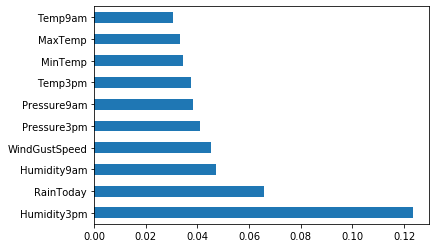

In [46]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
y = y[['RainTomorrow']]
X = df.drop(labels=['RainTomorrow'], axis=1)
print(X.shape)
X_etc = model.fit(X, y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
print(feat_importances.nlargest(10).keys())
plt.show()
X_etc = df[feat_importances.nlargest(10).keys().tolist()]

We are selecting top 30 features as the feature set is about 100 features after one hot encoding. 
The extra tree classifier validates our hypothesis that the features that we get from univariate feature selection are the important features.

# Split into Train / Test data 75:25

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_etc,y,test_size=0.25)

## Training
1. Select models and apply hyper parameters.
2. Use cross validation (k-fold).
We divide the trainh data into k subparts, train on k-1 parts and test on the reamining 1 part. Here we use 3 or 5 as our cv parameter.
3. Use GridSearch CV
here we list all the combinations of the hyper parameters that we would like to run the algorithm on.

## Logistic Regression
### Train
About Hyper-Parameters
1. Trying both l1 & l2 regularization penalty
2. Balanced weights as classes are unbalanced. This helps giving more weight to classes with lesser datapoints.
3. Using regularisation

We also did a dry run by using the default hyper parameters. This was used during feature scaling and fetuare selection phase.

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
#clf_logreg = LogisticRegression(random_state=0, class_weight='balanced', C=100)
#clf_logreg.fit(X_train,y_train)

## Hyper parameters

hyperparameters = dict(
    C=np.logspace( 2, 4, 6),     # regularization penalty 
    penalty=['l1', 'l2'],        # regularization hyperparameter
    #tol=np.logspace( 2, 4),
    #solver=['liblinear', 'saga'],# solvers to use
    class_weight=['balanced'],
    n_jobs=-1)                   # use all cpus 

#hyperparameters=dict()           # dry run

clf = GridSearchCV(LogisticRegression(), hyperparameters, cv=3, verbose=0)

#### Train and print best model

In [49]:
best_model = clf.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(best_model.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:43

Best parameters set found on development set:

{}


### Test & F1 score, Accuracy

In [50]:
from sklearn.metrics import classification_report
y_pred = best_model.predict(X_test)
report = classification_report(y_test,y_pred, labels=[0.0, 1.0])
print('Report :\n',report)

Report :
               precision    recall  f1-score   support

         0.0       0.86      0.94      0.90     27558
         1.0       0.71      0.47      0.57      7991

    accuracy                           0.84     35549
   macro avg       0.79      0.71      0.73     35549
weighted avg       0.83      0.84      0.83     35549



Inference : 
While training with successive combinations of feature selection / feature scaling phases, we found that GradientBoostingClassifier performed consistently better than Logistic regression.

## GradientBoostingClassifier
### Train
About Hyper-Parameters
max_depth: We limited the max_depth of the tree to 3,5,7 so as to prevent overfitting.
min_samples_leaf : these are the min number of samples to be a leaf node.
min_samples_split: min number of samples to split a  node.

We also did SMOTE analysis to oversample datapoints which were less frequent.This helps in balancing the classes.



In [0]:
#Decision Tree Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

## Hyper parameters
hyperparameters = dict(
    loss=['deviance', 'exponential'],
    learning_rate=[0.1, 0.0001, 1],     
    min_samples_split=[1, 2, 4],        
    #tol=np.logspace( 2, 4),
    subsample=[0.8, 1, 1.2],# solvers to use
    max_depth=[3,5,7],
    min_samples_leaf=[1,3,7])                   # use all cpus 

#hyperparameters=dict()           # dry run

model = Pipeline([
        ('sampling', SMOTE()),  ## Dry run
        ('classification', GradientBoostingClassifier())
    ])

clf = GridSearchCV(model, hyperparameters, cv=3, verbose=0)

### Train and print best model

In [52]:
best_model = clf.fit(X_train, y_train)
print("Best parameters set found on development set:")
print("{}")
#print(best_model.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Best parameters set found on development set:

{}


### Test & F1 score, Accuracy

In [53]:
from sklearn.metrics import classification_report
y_pred = best_model.predict(X_test)
score = classification_report(y_test,y_pred, labels=[0.0, 1.0])
print('Report :\n',score)
from sklearn.metrics import f1_score
score = f1_score(y_pred, y_test)
score

Report :
               precision    recall  f1-score   support

         0.0       0.91      0.82      0.87     27558
         1.0       0.54      0.73      0.62      7991

    accuracy                           0.80     35549
   macro avg       0.73      0.77      0.74     35549
weighted avg       0.83      0.80      0.81     35549



0.6219126707741762

## Conclusion:

We tried different combinations of feature selection and feature scaling techniques. Standard Scalar & onehot encoding resulted in the best results. Though in final feature list, one-hot encoded features were not included. Clearly, for the unbalanced class 1.0, when it will rain, we find that f1 score is lesser than class 0.0, when it will not rain. But this has consistently being improved upon from the baseline of 0.56, the most important part being, improving on the accuracy of the the minority classes. Usage of SMOTE/balanced class weights resulted in some improvement of f1 score.